The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [172]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read csv
df = pd.read_csv("./data/nobel.csv")
print(df.head())

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]


In [173]:
print(df.columns)


Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


**What is the most commonly awarded gender?**

In [174]:
top_gender_int = df["sex"].value_counts()
top_gender = top_gender_int.index[0]
top_gender

'Male'

Text(0.5, 1.0, 'Most commonly awarded gender')

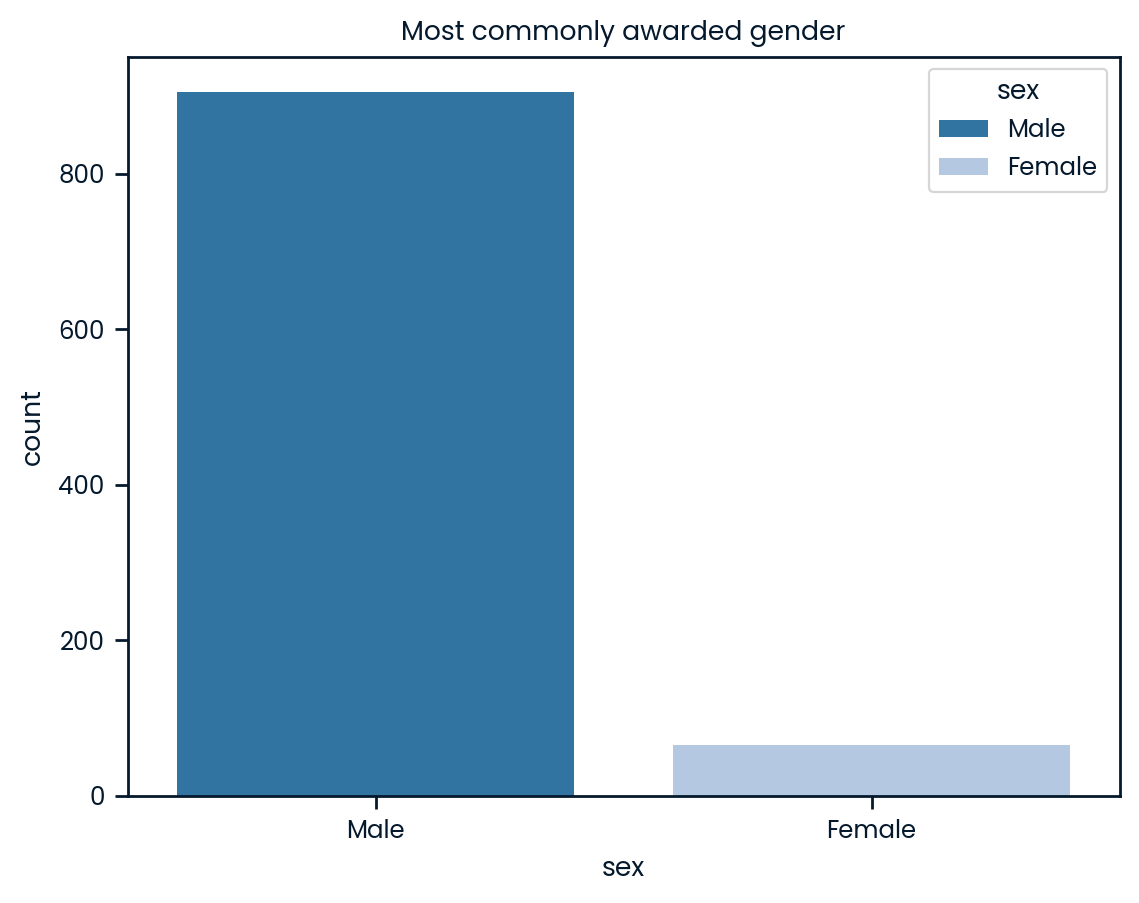

In [175]:
sns.set_context("paper")
g = sns.countplot(x = "sex", data=df, hue="sex")
g.set_title("Most commonly awarded gender")

**What is the most commonly awarded birth country?**

In [176]:
top_country_int = df['birth_country'].value_counts()[0:10]
top_country = top_country_int.index[0]
top_country

'United States of America'

[Text(0, 0.5, '')]

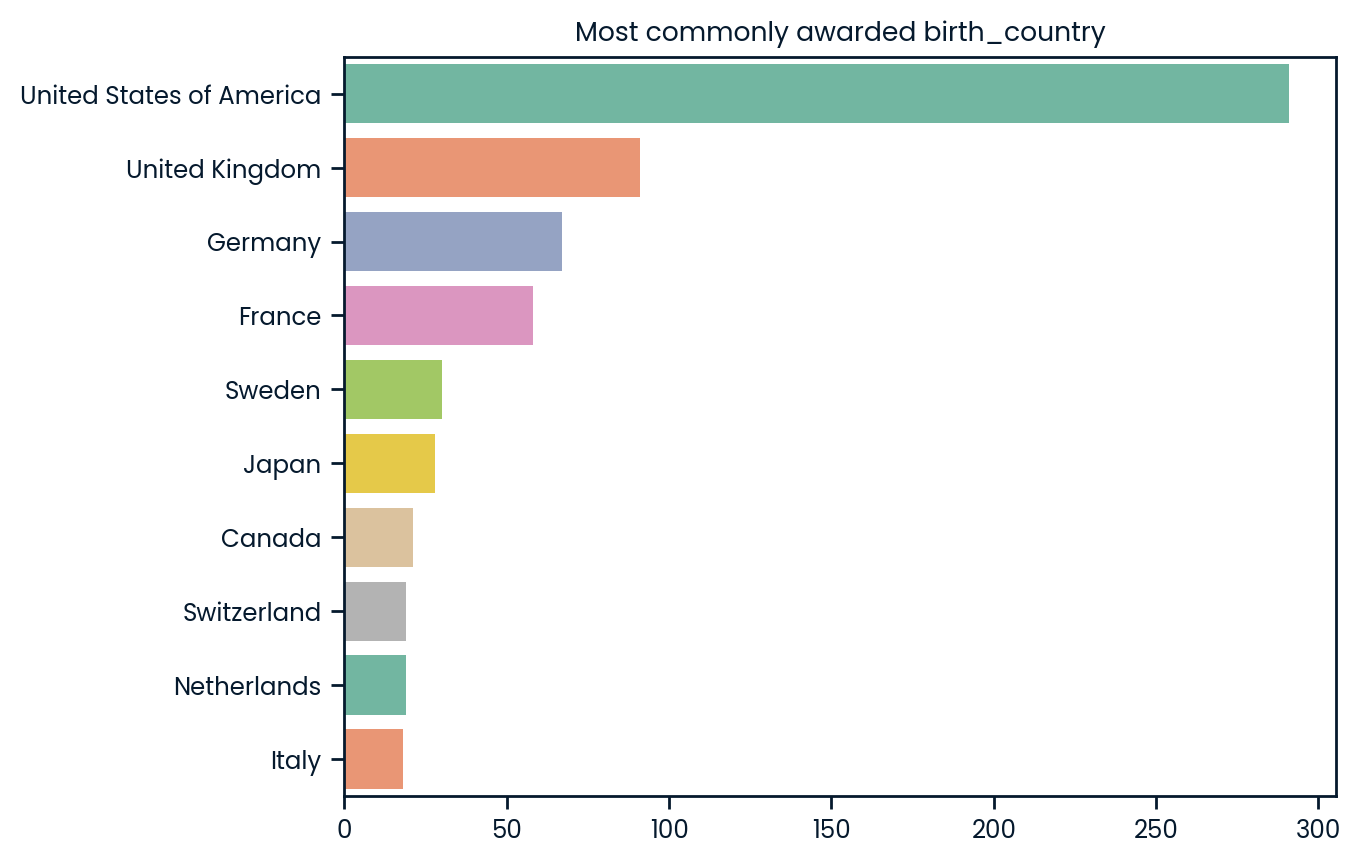

In [177]:
sns.set_context("paper")
g = sns.barplot(y=top_country_int.index, x=top_country_int.values, palette="Set2")
g.set_title("Most commonly awarded birth_country")
sns.set_palette("tab20")
g.set(ylabel=None)


**Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**

In [178]:
#Create "decade" column
df['decade'] = (df['year'] // 10) * 10
df['decade'] = df['decade'].astype(str)
decade_counts = df['decade'].value_counts().sort_index()
print(decade_counts)

1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010    121
2020     50
Name: decade, dtype: int64


In [179]:
#Create born_in_usa column - boolean
df['born_in_usa'] = df['birth_country'] == 'United States of America'

In [180]:
#Group by decade and aggregate total winners and usa winners
decade_stats = df.groupby('decade').agg(
    total_winners=('born_in_usa', 'count'),
    usa_winners=('born_in_usa', 'sum')
)
print(decade_stats)

        total_winners  usa_winners
decade                            
1900               57            1
1910               40            3
1920               54            4
1930               56           14
1940               43           13
1950               72           21
1960               79           21
1970              104           33
1980               97           31
1990              104           42
2000              123           52
2010              121           38
2020               50           18


Text(0.5, 1.03, 'US-born Nobel Prize winners x total winners in all categories')

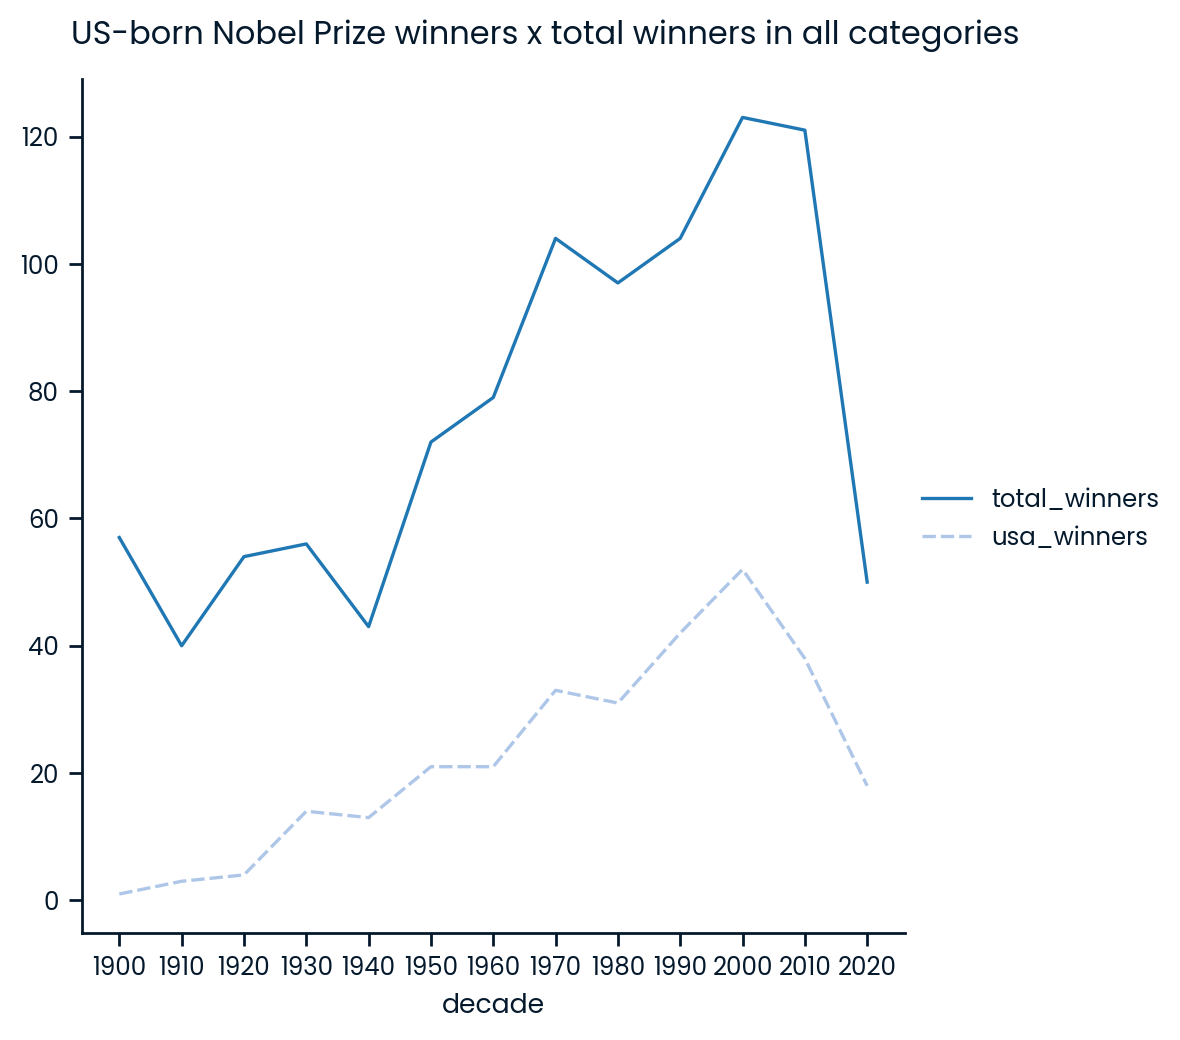

In [181]:
sns.set_context("paper")
g = sns.relplot(data=decade_stats, kind="line")
g.fig.suptitle("US-born Nobel Prize winners x total winners in all categories", y=1.03)

In [182]:
decade_stats['usa_ratio'] = decade_stats['usa_winners'] / decade_stats['total_winners']
max_decade_usa = int(decade_stats['usa_ratio'].idxmax())
max_ratio_usa = float(decade_stats['usa_ratio'].max())
print(max_decade_usa)
print(max_ratio_usa)

2000
0.42276422764227645


**Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

In [183]:
#Create boolean column for female laureate
df['female laureate'] = df['sex'] == 'Female'

In [184]:
#Group by decade and category to aggregate the sum of female and total laureates to each combination
decade_cat_fem = df.groupby(['decade','category']).agg(
    total_laureates=('sex', 'count'),
    fem_laureates=('female laureate', 'sum')
).reset_index()
print(decade_cat_fem)

   decade    category  total_laureates  fem_laureates
0    1900   Chemistry                9              0
1    1900  Literature               10              1
2    1900    Medicine               11              0
3    1900       Peace               13              1
4    1900     Physics               13              1
..    ...         ...              ...            ...
67   2020   Economics                9              1
68   2020  Literature                4              2
69   2020    Medicine                8              1
70   2020       Peace                4              2
71   2020     Physics               12              2

[72 rows x 4 columns]


In [185]:
#Calculate the proportion and find the ratio
decade_cat_fem['fem_ratio'] = decade_cat_fem['fem_laureates'] / decade_cat_fem['total_laureates']
max_female_ratio = max(decade_cat_fem['fem_ratio'])
print(max_female_ratio)

0.5


In [186]:
#Identify the combination with max ratio
max_female_high = decade_cat_fem[decade_cat_fem["fem_ratio"] == max_female_ratio]
max_female_high

,decade,category,total_laureates,fem_laureates,fem_ratio
64,2010,Peace,10,5,0.5
68,2020,Literature,4,2,0.5
70,2020,Peace,4,2,0.5


In [187]:
max_row = max_female_high.iloc[1]
print("Decade:", max_row['decade'])
print("Category:", max_row['category'])


Decade: 2020
Category: Literature


In [188]:
#Storing dictionary
max_female_dict = {
int(max_row['decade']):max_row['category']}
max_female_dict

{2020: 'Literature'}

**Who was the first woman to receive a Nobel Prize, and in what category?**

In [189]:
first_woman = df[(df['sex'] == "Female")].sort_values(by= "year", 
                                                           ascending=True)[0:1]
first_woman

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,born_in_usa,female laureate
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True


In [190]:
first_woman_name = first_woman["full_name"].values[0]
first_woman_category = first_woman["category"].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


**Which individuals or organizations have won more than one Nobel Prize throughout the years?**

In [191]:
ind_prize_count = df['full_name'].value_counts()
repeat_list = list(ind_prize_count[ind_prize_count > 1].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']